In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score
import os


In [2]:
import kagglehub

In [3]:
path = kagglehub.dataset_download("vijayaadithyanvg/car-price-predictionused-cars")
print("Path to dataset files:", path)


100%|██████████| 3.76k/3.76k [00:00<00:00, 6.91MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/vijayaadithyanvg/car-price-predictionused-cars/versions/1


In [4]:
csv_files = [f for f in os.listdir(path) if f.endswith('.csv')]
dataset_path = os.path.join(path, csv_files[0])
dataset = pd.read_csv(dataset_path)


In [5]:
print(dataset.head())

  Car_Name  Year  Selling_Price  Present_Price  Driven_kms Fuel_Type  \
0     ritz  2014           3.35           5.59       27000    Petrol   
1      sx4  2013           4.75           9.54       43000    Diesel   
2     ciaz  2017           7.25           9.85        6900    Petrol   
3  wagon r  2011           2.85           4.15        5200    Petrol   
4    swift  2014           4.60           6.87       42450    Diesel   

  Selling_type Transmission  Owner  
0       Dealer       Manual      0  
1       Dealer       Manual      0  
2       Dealer       Manual      0  
3       Dealer       Manual      0  
4       Dealer       Manual      0  


In [6]:
print(dataset.isnull().sum())

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Driven_kms       0
Fuel_Type        0
Selling_type     0
Transmission     0
Owner            0
dtype: int64


In [7]:
X = dataset.iloc[:, :-1]
y = dataset.iloc[:, -1]

In [17]:
# Separate features (X) and target (y)
X = dataset.drop('Owner', axis=1)
y = dataset['Owner']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.3,
                                                    random_state=42)

In [9]:
print(X_train.info())
print(X_train["Car_Name"].value_counts())

<class 'pandas.core.frame.DataFrame'>
Index: 210 entries, 185 to 102
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       210 non-null    object 
 1   Year           210 non-null    int64  
 2   Selling_Price  210 non-null    float64
 3   Present_Price  210 non-null    float64
 4   Driven_kms     210 non-null    int64  
 5   Fuel_Type      210 non-null    object 
 6   Selling_type   210 non-null    object 
 7   Transmission   210 non-null    object 
dtypes: float64(2), int64(2), object(4)
memory usage: 14.8+ KB
None
Car_Name
city                        17
corolla altis               10
verna                        9
brio                         9
grand i10                    7
                            ..
Bajaj Avenger Street 220     1
Bajaj Discover 125           1
Hero Passion X pro           1
Hero Glamour                 1
Hyosung GT250R               1
Name: count, Length: 83, dtype: int64


In [10]:
make_train = X_train["Car_Name"].str.split(" ", expand=True)
print(make_train.head())


           0       1     2     3     4
185   Suzuki  Access   125  None  None
72   corolla   altis  None  None  None
15    ertiga    None  None  None  None
10      alto     800  None  None  None
196   Activa      3g  None  None  None


In [18]:
# Drop the 'Car_Name' column as it has too many unique values
X_train = X_train.drop("Car_Name", axis=1)
X_test = X_test.drop("Car_Name", axis=1)

# Concatenate X_train and X_test for consistent one-hot encoding
X_combined = pd.concat([X_train, X_test], ignore_index=True)

# Apply one-hot encoding to categorical features on the combined data
X_combined = pd.get_dummies(X_combined, columns=['Fuel_Type', 'Selling_type', 'Transmission'], drop_first=True)

# Split the combined data back into training and testing sets
X_train = X_combined.iloc[:len(X_train)]
X_test = X_combined.iloc[len(X_train):]

In [12]:
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [20]:
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)


In [21]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [22]:
print("Linear Regression R² Score:", r2_score(y_test, y_pred_lr))
print("Random Forest R² Score:", r2_score(y_test, y_pred_rf))

Linear Regression R² Score: -0.2777552973250703
Random Forest R² Score: -1.4560797752808994


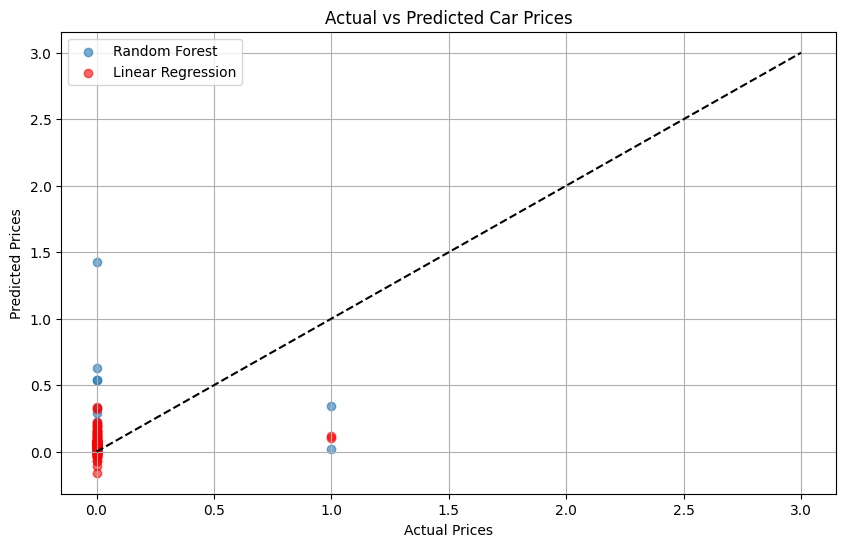

In [23]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.6, label='Random Forest')
plt.scatter(y_test, y_pred_lr, alpha=0.6, label='Linear Regression', color='red')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.title('Actual vs Predicted Car Prices')
plt.legend()
plt.grid(True)
plt.show()